<a href="https://colab.research.google.com/github/basleal22/kaim-week-1/blob/task-1/notebooks/EDA_raw_analyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/basleal22/kaim-week-1
%cd kaim-week-1
!git switch task-1


Cloning into 'kaim-week-1'...
remote: Enumerating objects: 383, done.
remote: Counting objects: 100% (204/204), done.
remote: Compressing objects: 100% (140/140), done.
remote: Total 383 (delta 102), reused 153 (delta 55), pack-reused 179 (from 1)
Receiving objects: 100% (383/383), 5.00 MiB | 26.95 MiB/s, done.
Resolving deltas: 100% (205/205), done.
/content/kaim-week-1
Branch 'task-1' set up to track remote branch 'task-1' from 'origin'.
Switched to a new branch 'task-1'


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import sys

# Set working directory to project root
os.chdir(r'/content/kaim-week-1')

# Add current directory to Python path
sys.path.append('.')

# Now import should work
from scripts.utils import read_csv_file, count_headline_length

read the csv file and display the first 30 rows

In [4]:
data_path = "/content/drive/MyDrive/raw_analyst_ratings.csv"
data = read_csv_file(data_path)
data=data.get("data")
data.head(10)


,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 11:23:25-04:00,A
6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 09:36:20-04:00,A
7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 09:07:04-04:00,A
8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 08:37:59-04:00,A
9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 08:06:17-04:00,A


In [5]:
from scripts.utils import count_headline_length
result=count_headline_length(data)
print("mean length:", result.get("mean"))
print("median length:", result.get("median_length"))
print("standard deviation:", result.get("stdev_length"))
print("headline length counts:", data.shape[0]-1)


mean length: 73.12051490484095
median length: 64.0
standard deviation: 40.73529545937668
headline length counts: 1407327


Counting number of publishers per article

In [6]:
import pandas as pd
#print(data.dtypes)
data_1 = pd.DataFrame(data)
publisher_counts=data_1["publisher"].value_counts()
print(publisher_counts)



publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64


Visualizing trends over time

In [7]:
#convert publication_date to datetime
data['date']=pd.to_datetime(data['date'],errors='coerce',format='%Y-%m-%d %H:%M:%S')
#create year,month,day columns
data['year']=data['date'].dt.year
data['month']=data['date'].dt.month
data['day']=data['date'].dt.day
#group by year,month,day and count the number of articles and analyze the trends
articles_by_year= data.groupby('year').size()
articles_by_month=data.groupby('month').size()
articles_by_day=data.groupby('day').size()




Plot the trends through daily, weekly, monthly and yearly analysis

['headline', 'url', 'publisher', 'date', 'stock', 'year', 'month', 'day']


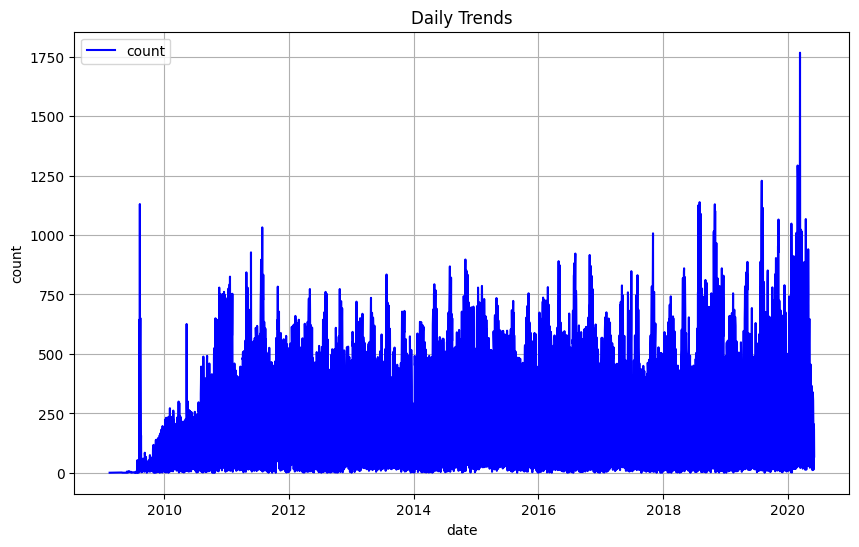

<Figure size 640x480 with 0 Axes>

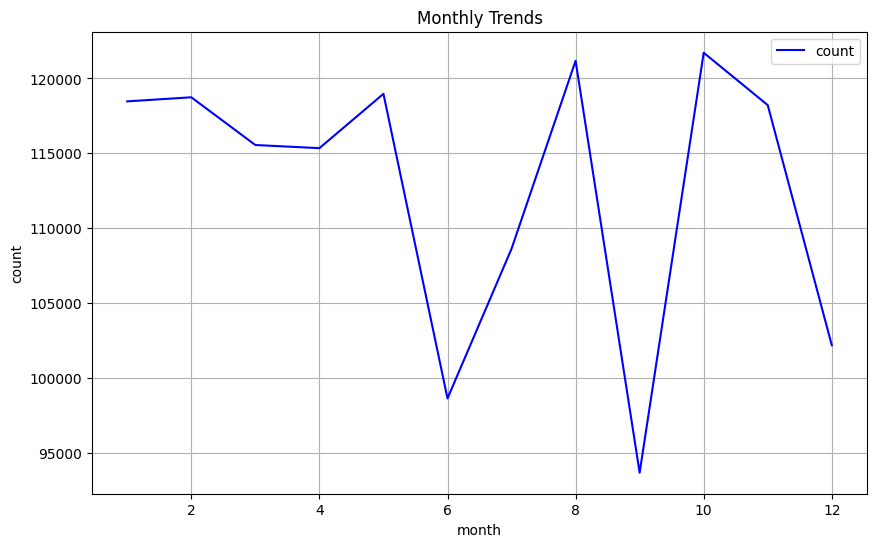

<Figure size 640x480 with 0 Axes>

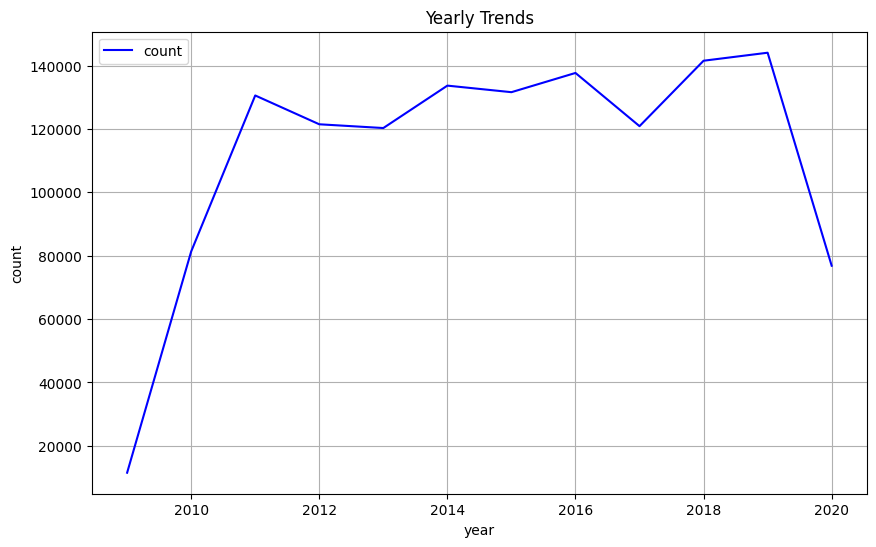

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [8]:
#group by date,month,year and calculate the mean of the stock_value
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
daily_data = data.groupby(data['date'].dt.date)[numeric_columns].mean().reset_index()
monthly_data = data.groupby(data['date'].dt.month)[numeric_columns].mean().reset_index()
yearly_data = data.groupby(data['date'].dt.year)[numeric_columns].mean().reset_index()
print(list(data.columns))
#plot the trends
from scripts.plot import plot_stock_data
#for daily analysis
daily_counts = data.groupby('date').size().reset_index(name='count')
plot_stock_data(daily_counts,date_column='date',stock_value_column='count',title='Daily Trends')
# For monthly analysis
monthly_counts = data.groupby('month').size().reset_index(name='count')
plot_stock_data(monthly_counts,date_column='month',stock_value_column='count',title='Monthly Trends')
# For yearly analysis
yearly_counts = data.groupby('year').size().reset_index(name='count')
plot_stock_data(yearly_counts,date_column='year',stock_value_column='count',title='Yearly Trends')

Perform a sentinel analysis. We will use advanced NLP libraries like textBlob, vader or transformers.

In [9]:
from scripts.utils import analyze_sentiment
from scripts.utils import get_sentiment_category
#apply sentiment analysis to the headline column
#add a new column to the dataframe called sentiment and polarity
data['polarity'] = data['headline'].apply(analyze_sentiment).apply(pd.Series)
#print(data.shape)

In [10]:
#add a new column to the dataframe called sentiment_category
data['sentiment_category'] = data['polarity'].apply(get_sentiment_category)

Print the summary of the sentiment category we created

In [11]:
#print summary
print("Summary of the sentiment category:\n")
#print(sample_headline['sentiment_category'].head())
print(data['sentiment_category'].value_counts())



Summary of the sentiment category:

sentiment_category
neutral     934914
positive    341178
negative    131236
Name: count, dtype: int64


Find common keywords

In [12]:
from scripts.utils import common_phrases
data['common_phrases'] = data['headline'].apply(common_phrases)
print(data['common_phrases'].head())



0           [stock]
1           [stock]
2                []
3           [stock]
4    [price target]
Name: common_phrases, dtype: object


In [24]:
!git add .

In [25]:
!git commit -m 'modified'

On branch task-1
Your branch is up to date with 'origin/task-1'.

nothing to commit, working tree clean


In [21]:
!git config --global user.email "solibaslu@gmail.com"

In [22]:
!git config --global user.name "basleal22"

/content/kaim-week-1/scripts/utils.py:67: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = data.resample('M').size()


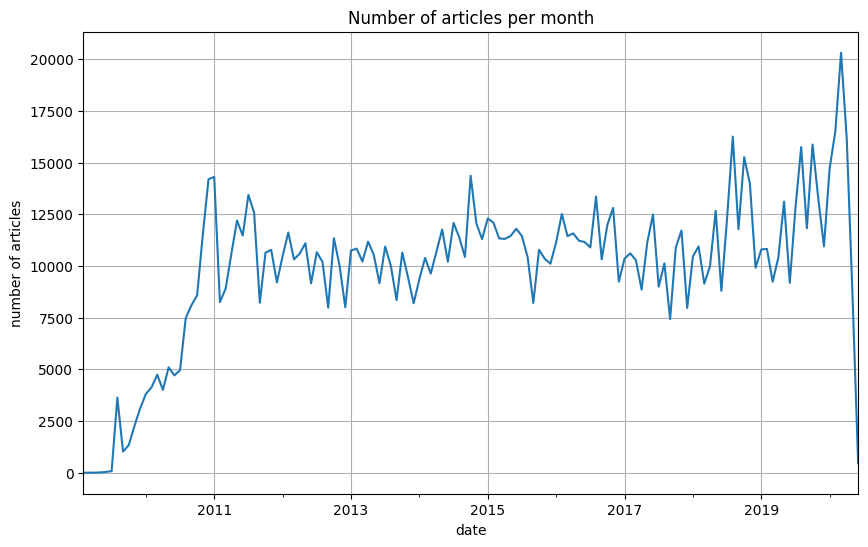

date
2009-02-28        1
2009-03-31        0
2009-04-30        3
2009-05-31       12
2009-06-30       40
              ...  
2020-02-29    16523
2020-03-31    20314
2020-04-30    16141
2020-05-31     8659
2020-06-30      457
Length: 137, dtype: int64


In [26]:
from scripts.utils import timeseries_analysis
data['date'] = pd.to_datetime(
    data[['year', 'month', 'day']]
)
monthly_counts=timeseries_analysis(data)
print(monthly_counts)

below we can see which data spiked on which date along with the ploted graph

/content/kaim-week-1/scripts/utils.py:77: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = data.resample('M').size()


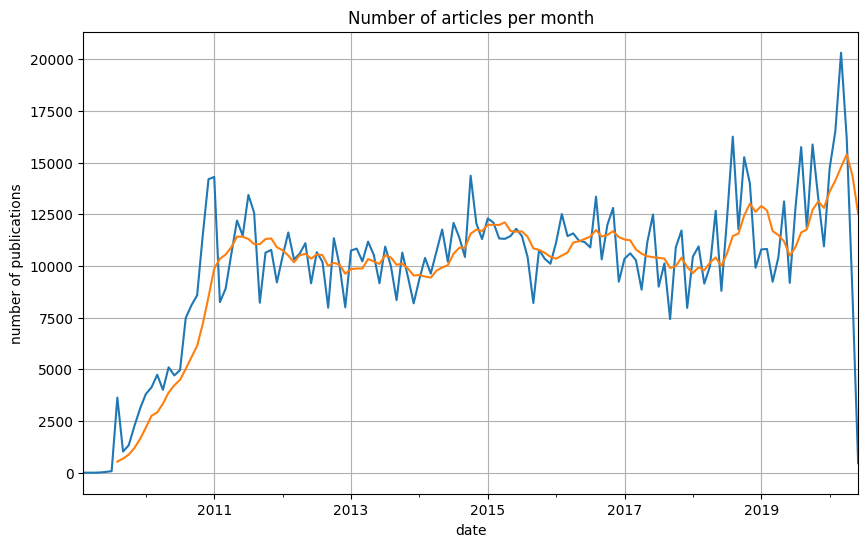

detected spikes in the data: date
2018-08-31    16255
2018-10-31    15261
2019-08-31    15750
2019-10-31    15874
2020-02-29    16523
2020-03-31    20314
2020-04-30    16141
dtype: int64
Monthly Counts:
date
2009-02-28        1
2009-03-31        0
2009-04-30        3
2009-05-31       12
2009-06-30       40
              ...  
2020-02-29    16523
2020-03-31    20314
2020-04-30    16141
2020-05-31     8659
2020-06-30      457
Length: 137, dtype: int64

Monthly Moving Average:
date
2009-02-28             NaN
2009-03-31             NaN
2009-04-30             NaN
2009-05-31             NaN
2009-06-30             NaN
                  ...     
2020-02-29    14130.571429
2020-03-31    14782.571429
2020-04-30    15399.285714
2020-05-31    14368.571429
2020-06-30    12538.714286
Length: 137, dtype: float64

Spikes in Article Publications:


In [27]:
from scripts.utils import spike_analysis
data['date'] = pd.to_datetime(
    data[['year', 'month', 'day']]
)
monthly_counts, monthly_moving_average, spikes = spike_analysis(data)

# Print the individual values
print("Monthly Counts:")
print(monthly_counts)

print("\nMonthly Moving Average:")
print(monthly_moving_average)

print("\nSpikes in Article Publications:")